# **Waze User Churn Project**

### **Task 1. Imports and data loading**

We import the packages that we will need to load and explore the dataset.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

Then, we load the dataset into a dataframe. Creating a dataframe helps me conduct data manipulation, exploratory data analysis (EDA), and statistical activities.

In [2]:
# Loading the dataset into a dataframe.
df = pd.read_csv('waze_dataset.csv')

### **Task 2. Summary information**

We can view and inspect summary information about the dataframe:

*We can begin by considering the following questions:*

1. What are the data types? 

2. How many rows and columns do we have?

2. Does the dataset have any missing values?

In [3]:
# Printing a sample of my data frame to examine its appearance and available variables.
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238698,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [4]:
# Exploring the data frame for data types, number of columns & rows, memory usage, as well as evidence of NaN values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [5]:
# Indicating the number of NaNs per variable
df.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [6]:
# Pointing out the total numbers of NaNs in my data frame.
df.isna().sum().sum()

700

**Answers:** 

>1) We have multiple data types as our dataset is consists of 8 integers and 3 float numbers, as well as 2 strings (objects).

>2) Using the .info() method, we can see that we have available data for 13 variables with a total of 14999 entries. Important to notice that the 'label' variable has fewer 
    entries indicating missing values in its rows.

>2) We have NaNs in the 'label' column. Specifically, 700 rows are empty. This variable indicates the customer's status revealing if he is churned or not. Since the main objective of the project is to analyze the customers based on this status, then due to important missing information we could clear the nulls in the dataset by rows.

### **Task 3. Null values and summary statistics**

We now compare the summary statistics of the 700 rows that are missing labels with summary statistics of the rows that are not missing any values.

Our goal is to find the answer to the **question:**

Is there a discernible difference between the two populations?


In [7]:
# Isolating rows with null values
df_na = df.loc[df['label'].isna()]
# Displaying summary stats of rows with null values
df_na.describe().round(2)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00
mean,7405.58,80.84,67.80,198.48,1709.30,118.72,30.37,3935.97,1795.12,15.38,12.13
std,4306.90,79.99,65.27,140.56,1005.31,156.31,46.31,2443.11,1419.24,8.77,7.63
min,77.00,0.00,0.00,5.58,16.00,0.00,0.00,290.12,66.59,0.00,0.00
25%,3744.50,23.00,20.00,94.06,869.00,4.00,0.00,2119.34,779.01,8.00,6.00
50%,7443.00,56.00,47.50,177.26,1650.50,62.50,10.00,3421.16,1414.97,15.00,12.00
75%,11007.00,112.25,94.00,266.06,2508.75,169.25,43.00,5166.10,2443.96,23.00,18.00
max,14993.00,556.00,445.00,1076.88,3498.00,1096.00,352.00,15135.39,9746.25,31.00,30.00


In [8]:
# Isolating rows without null values
data = df.dropna()
# Displaying summary stats of rows without null values
data.describe().round(2)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.00,14299.00,14299.00,14299.00,14299.00,14299.00,14299.00,14299.00,14299.00,14299.00,14299.00
mean,7503.57,80.62,67.26,189.55,1751.82,121.75,29.64,4044.40,1864.20,15.54,12.18
std,4331.21,80.74,65.95,136.19,1008.66,147.71,45.35,2504.98,1448.01,9.02,7.83
min,0.00,0.00,0.00,0.22,4.00,0.00,0.00,60.44,18.28,0.00,0.00
25%,3749.50,23.00,20.00,90.46,878.50,10.00,0.00,2217.32,840.18,8.00,5.00
50%,7504.00,56.00,48.00,158.72,1749.00,71.00,9.00,3496.55,1479.39,16.00,12.00
75%,11257.50,111.00,93.00,253.54,2627.50,178.00,43.00,5299.97,2466.93,23.00,19.00
max,14998.00,743.00,596.00,1216.15,3500.00,1236.00,415.00,21183.40,15851.73,31.00,30.00


**Answer:**  
>Comparing summary statistics of the observations with missing retention labels with those that aren't missing any values reveals nothing remarkable. The means and standard deviations are fairly consistent between the two groups.

### **Task 4. Null values - device counts**

Next, we check the two populations with respect to the `device` variable.

Let's examine the **question:**

How many iPhone users had null values and how many Android users had null values?

In [9]:
# Getting the count of null values by device
df_na['device'].value_counts()

iPhone     447
Android    253
Name: device, dtype: int64

**Answer:**  
>We can see that from the 700 total null values, 447 users are using iPhone devices and 253 Android.

Now, of the rows with null values, we are calculating the percentage with each device -- Android and iPhone.

In [10]:
# Calculating the % of iPhone nulls and Android nulls
iPhone_na = df_na['device'].value_counts()['iPhone'] / df_na.shape[0]
Android_na = df_na['device'].value_counts()['Android'] / df_na.shape[0]
print('The percentage of iPhone devices in null values is: ',iPhone_na.round(2))
print('The percentage of Android devices in null values is: ',Android_na.round(2))

The percentage of iPhone devices in null values is:  0.64
The percentage of Android devices in null values is:  0.36


Now let's examine, how does this compare to the device ratio in the full dataset?

In [11]:
# Calculating the % of iPhone users and Android users in full dataset
data.device.value_counts()

iPhone     9225
Android    5074
Name: device, dtype: int64

In [12]:
# Below a cleaner way to present the relative frequencies of the unique values.
iPhone = data.device.value_counts(normalize = True).iPhone
Android = data.device.value_counts(normalize = True).Android
print('The percentage of iPhone devices in the full dataset w/o null values is: ',iPhone.round(2))
print('The percentage of Android devices in the full dataset w/o null values is: ',Android.round(2))

The percentage of iPhone devices in the full dataset w/o null values is:  0.65
The percentage of Android devices in the full dataset w/o null values is:  0.35


The percentage of missing values by each device is consistent with their representation in the data overall.

There is nothing to suggest a non-random cause of the missing data.

We continue by examining the counts and percentages of users who churned vs. those who were retained. 

Our **question** is:

How many of each group are represented in the data?

In [13]:
# As was said, the 'label' variable is a boolean variable representing only two aspects of our data.
data['label'].unique()

array(['retained', 'churned'], dtype=object)

In [14]:
# Calculating the counts of churned vs. retained
retained = data.label.value_counts().retained
churned = data.label.value_counts().churned
print('the count of retained is: ',retained)
print('the count of churned is: ',churned)

the count of retained is:  11763
the count of churned is:  2536


In [15]:
# Calculating the percentage representation of each label
retained_pers = retained / data.shape[0]
churned_pers = churned /data.shape[0]
print('the persentage of retained is: ',round(retained_pers,2))
print('the persentage of churned is: ',round(churned_pers,2))

the persentage of retained is:  0.82
the persentage of churned is:  0.18


This dataset contains 82% retained users and 18% churned users.

Next, we compare the medians of each variable for churned and retained users. The reason for calculating the median and not the mean is that we don't want outliers to unduly affect the portrayal of a typical user. Notice, for example, that the maximum value in the `driven_km_drives` column is 21,183 km. That's more than half the circumference of the earth!

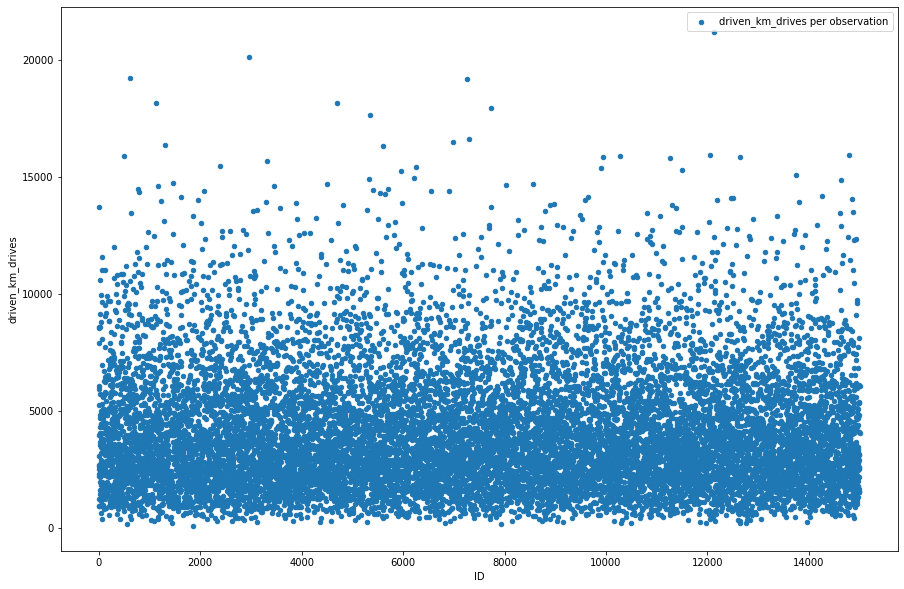

In [16]:
# let's take a quick pic of outliers in the 'driven_km_drives' variable:
data.plot.scatter(x='ID',y='driven_km_drives',label='driven_km_drives per observation',figsize=(15,10))
None

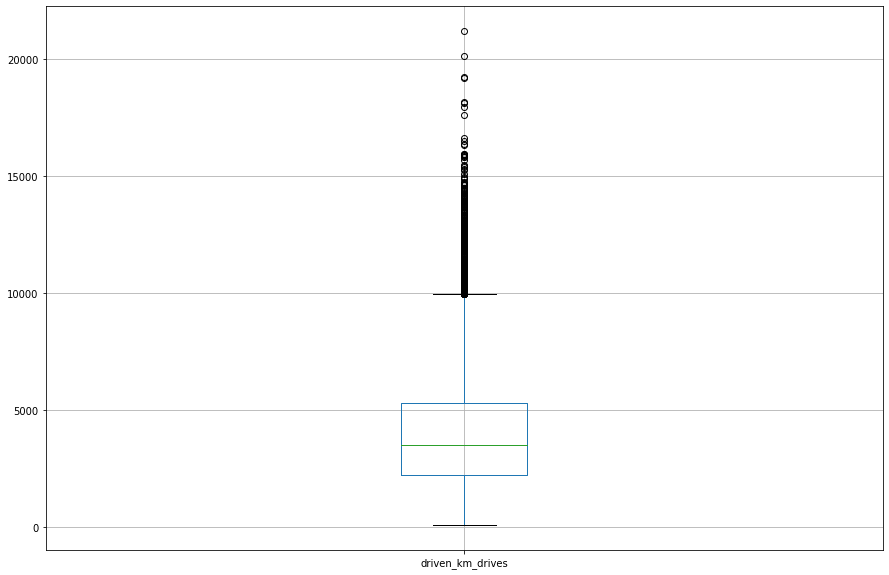

In [17]:
data[['driven_km_drives']].boxplot(figsize=(15,10))
None

# Calculating median values of all columns for churned and retained users

In [18]:
# Grouping data by `label` and calculating the medians:
med = data.groupby('label').median().round(2)
med

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.34,1321.0,84.5,11.0,3652.66,1607.18,8.0,6.0
retained,7509.0,56.0,47.0,157.59,1843.0,68.0,9.0,3464.68,1458.05,17.0,14.0


This offers an interesting snapshot of the two groups, churned vs. retained:

Users who churned, averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile.

##### Calculating the median kilometers per drive in the last month for both retained and churned users.

In [19]:
# Dividing the median distance by median number of drives:
km_per_drive_ch = med['driven_km_drives']['churned'] / med['drives']['churned']
km_per_drive_ret = med['driven_km_drives']['retained'] / med['drives']['retained']

print('The median kilometers per drive in the last month for churned is: ',round(km_per_drive_ch,2))
print('The median kilometers per drive in the last month for retained is: ',round(km_per_drive_ret,2))

The median kilometers per drive in the last month for churned is:  73.05
The median kilometers per drive in the last month for retained is:  73.72


The median user from both groups drove ~73 km/drive. 

The **question** is:

How many kilometers per driving day was this?

In [20]:
# Dividing the median distance by median number of driving days:
med_dist_per_driving_days_ch = med['driven_km_drives']['churned'] / med['driving_days']['churned']
med_dist_per_driving_days_ret = med['driven_km_drives']['retained'] / med['driving_days']['retained']

print('The median distance per driving days in the last month for churned is: ',round(med_dist_per_driving_days_ch,2))
print('The median distance per driving days in the last month for retained is: ',round(med_dist_per_driving_days_ret,2))

The median distance per driving days in the last month for churned is:  608.78
The median distance per driving days in the last month for retained is:  247.48


Now, we calculate the median number of drives per driving day for each group.

In [21]:
# Dividing the median number of drives by median number of driving days
drives_per_days_ch = med['drives']['churned'] / med['driving_days']['churned']
drives_per_days_ret = med['drives']['retained'] / med['driving_days']['retained']
print('The median number of drives per driving days in the last month for churned is: ',round(drives_per_days_ch,2))
print('The median number of drives per driving days in the last month for retained is: ',round(drives_per_days_ret,2))

The median number of drives per driving days in the last month for churned is:  8.33
The median number of drives per driving days in the last month for retained is:  3.36


The median user who churned, drove 608 kilometers each day they drove last month, which is almost 250% the per-drive-day distance of retained users. The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.

It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data are serious drivers! It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data&mdash;and in particular the sample of churned users&mdash;contains a high proportion of long-haul truckers.

In consideration of how much these users drive, it would be worthwhile to gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver.

Finally, we examine whether there is an imbalance in how many users churned by device type.

We begin by getting the overall counts of each device type for each group, churned and retained.

In [22]:
# For each label, we calculate the number of Android users and iPhone users
data.groupby(['label','device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

Now, within each group, churned and retained, we calculate what percent was Android and what percent was iPhone.

In [23]:
# For each label, we calculate the percentage of Android users and iPhone users
data.groupby('label')['device'].value_counts(normalize = True).round(2)

label     device 
churned   iPhone     0.65
          Android    0.35
retained  iPhone     0.64
          Android    0.36
Name: device, dtype: float64

The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.